In [1]:
import pyemu
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wd = "D:/spark/animas_amrs"
os.chdir(wd)

In [3]:
# specify a template directory (i.e. the PstFrom working folder)
# tmp_d = os.path.join(wd, "Animas_AMRS-Fire_org")
template_ws = os.path.join(wd, "ies_template_all")
start_datetime="1-1-1987"
# instantiate PstFrom
# pf = pyemu.utils.PstFrom(original_d=tmp_d, # where the model is stored
#                             new_d=template_ws, # the PEST template folder
#                             remove_existing=True, # ensures a clean start
#                             longnames=True, # set False if using PEST/PEST_HP
# #                             spatial_reference=sr, #the spatial reference we generated earlier
#                             zero_based=False, # does the MODEL use zero based indices? For example, MODFLOW does NOT
# #                             start_datetime=start_datetime, # required when specifying temporal correlation between parameters
#                             echo=False) # to stop PstFrom from writting lots of infromation to the notebook; experiment by setting it as True to see the difference; usefull for troubleshooting

In [4]:
pst_path = os.path.join(template_ws, 'animas_amrs.pst')

In [5]:
# pst_path = os.path.join(t_d, 'freyberg_mf6.pst')
pst = pyemu.Pst(pst_path)

In [6]:
par = pst.parameter_data

In [7]:
pyemu.os_utils.run('pestpp-glm animas_amrs.pst', cwd=template_ws)

In [8]:
pst.control_data.noptmax = -1

In [9]:
pst.write(os.path.join(template_ws,"animas_diagprior_test.pst"))

noptmax:-1, npar_adj:44, nnz_obs:4486


In [8]:
pst.pestpp_options['ies_num_reals'] = 100
pst.control_data.noptmax = -1
pst.write(os.path.join(template_ws,"animas_diagprior2.pst"))

noptmax:-1, npar_adj:118, nnz_obs:4486


In [ ]:
m_d = "main_diagonal_prior_mc" 
pyemu.os_utils.start_workers(template_ws,"pestpp-ies","animas_diagprior.pst",
                            num_workers=2,
                            worker_root='.',
                            master_dir=m_d)

In [55]:
pst = pyemu.Pst(os.path.join(template_ws, 'animas_diagprior.pst'))

In [66]:
pst.write_par_summary_table(filename="none")

type transform  count         initial value          lower bound   
apex      apex       log     16   -2.56067 to 1.70329       -5 to 0.176091  \
aquf      aquf       log      3                    -5             -9.95861   
initc    initc       log     10               1.69897                   -4   
rivbot  rivbot     fixed      5                5.0001                  0.1   
rivcd    rivcd       log      5               1.69906                   -1   
soil      soil       log     10  -0.729321 to 1.37548  -1.02687 to 1.28217   

                 upper bound      standard deviation  
apex       -2.49485 to     2    0.0358555 to 1.54402  
aquf                -0.30103                 2.41439  
initc                      2                     1.5  
rivbot                    10                   2.475  
rivcd                      2                    0.75  
soil    -0.554396 to 1.45225  0.00783592 to 0.118119

In [67]:
pst.npar_adj

44

In [56]:
obs_df = pd.read_csv(os.path.join(m_d,"animas_diagprior.0.obs.csv"),index_col=0)

In [57]:
pst.try_parse_name_metadata()

In [58]:
obs = pst.observation_data.copy()

In [59]:
time_col = []
for i in range(len(obs)):
    if obs.iloc[i, 0][0] == "d":
        time_col.append(obs.iloc[i, 0][-8:])
    elif obs.iloc[i, 0][0] == "m":
        time_col.append(obs.iloc[i, 0][-6:])


In [60]:
obs.time = time_col

In [61]:
obs.loc[obs["obgnme"]=="m075_lso4"]

obsnme    obsval  weight     obgnme  oname  otype   
obsnme                                                                          
m075_lso4_199201  m075_lso4_199201  125538.0     1.0  m075_lso4    NaN    NaN  \
m075_lso4_199203  m075_lso4_199203  159924.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_199205  m075_lso4_199205  273633.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_199208  m075_lso4_199208  155396.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_199211  m075_lso4_199211  138996.0     1.0  m075_lso4    NaN    NaN   
...                            ...       ...     ...        ...    ...    ...   
m075_lso4_200906  m075_lso4_200906  220707.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_200912  m075_lso4_200912  130089.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_201005  m075_lso4_201005  248012.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_201007  m075_lso4_201007  116313.0     1.0  m075_lso4    NaN    NaN   
m075_lso4_201111  m075_lso4_201111  151840.0     1.0  m075_lso4    NaN    NaN   

                  usecol    time   i   j  totim  
obsnme                                           
m075_lso4_199201     NaN  199201 NaN NaN    NaN  
m075_lso4_199203     NaN  199203 NaN NaN    NaN  
m075_lso4_199205     NaN  199205 NaN NaN    NaN  
m075_lso4_199208     NaN  199208 NaN NaN    NaN  
m075_lso4_199211     NaN  199211 NaN NaN    NaN  
...                  ...     ...  ..  ..    ...  
m075_lso4_200906     NaN  200906 NaN NaN    NaN  
m075_lso4_200912     NaN  200912 NaN NaN    NaN  
m075_lso4_201005     NaN  201005 NaN NaN    NaN  
m075_lso4_201007     NaN  201007 NaN NaN    NaN  
m075_lso4_201111     NaN  201111 NaN NaN    NaN  

[69 rows x 11 columns]

In [62]:
ogs = obs.obgnme.unique()

In [63]:
ogs

array(['d009_cca', 'd009_ck', 'd009_cmg', 'd009_cna', 'd009_cso4',
       'd009_lca', 'd009_lk', 'd009_lmg', 'd009_lna', 'd009_lso4',
       'd012_cca', 'd012_ccl', 'd012_chco3', 'd012_ck', 'd012_cmg',
       'd012_cna', 'd012_cso4', 'd012_lca', 'd012_lcl', 'd012_lhco3',
       'd012_lk', 'd012_lmg', 'd012_lna', 'd012_lso4', 'd075_cca',
       'd075_ccl', 'd075_cco', 'd075_chco3', 'd075_ck', 'd075_cmg',
       'd075_cna', 'd075_cso4', 'd075_lca', 'd075_lcl', 'd075_lco',
       'd075_lhco3', 'd075_lk', 'd075_lmg', 'd075_lna', 'd075_lso4',
       'm009_lca', 'm009_lk', 'm009_lmg', 'm009_lna', 'm009_lso4',
       'm012_lca', 'm012_lcl', 'm012_lhco3', 'm012_lk', 'm012_lmg',
       'm012_lna', 'm012_lso4', 'm075_lca', 'm075_lcl', 'm075_lco',
       'm075_lhco3', 'm075_lk', 'm075_lmg', 'm075_lna', 'm075_lso4'],
      dtype=object)

In [64]:
ogs = [i for i in ogs if i[5] == "l"]

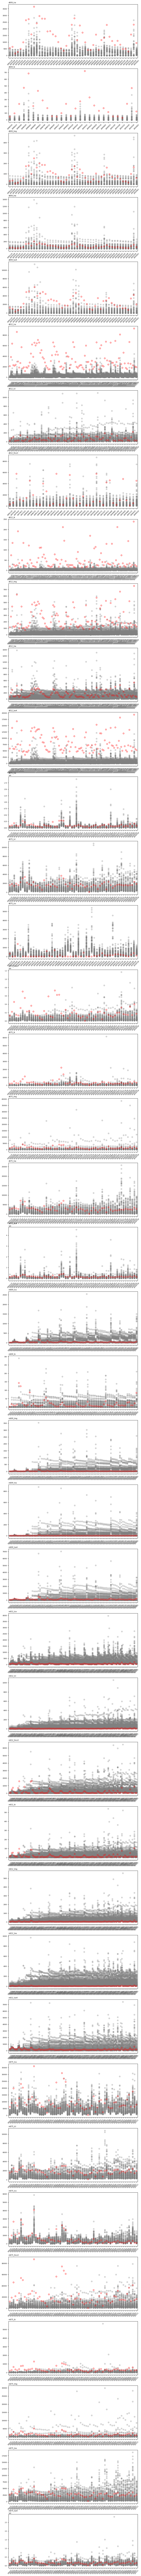

In [65]:
fig,axes = plt.subplots(len(ogs),1,figsize=(10,5*len(ogs)))
ogs.sort()
for ax,og in zip(axes,ogs):
    oobs = obs.loc[obs.obgnme==og,:].copy()
    oobs.loc[:,"time"] = oobs.time.astype(str)
#     oobs.sort_values(by="time",inplace=True)
    tvals = oobs.time.values
    onames = oobs.obsnme.values
#     [ax.plot(tvals,obs_df.loc[i,onames].values,"0.5",lw=0.5,alpha=0.5) for i in obs_df.index]
    [ax.scatter(tvals,obs_df.loc[i,onames].values, color="gray", alpha=0.3) for i in obs_df.index]
    oobs = oobs.loc[oobs.weight>0,:]
    ax.scatter(oobs.time,oobs.obsval, color="red", label="Observed", s=30).set_facecolor("none")
    ax.tick_params(axis='x', labelrotation=45)
    ax.margins(x=0.01)
    ax.set_title(og,loc="left")